In [51]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
import warnings
from sklearn.metrics import silhouette_score
plt.rcParams["figure.figsize"] = (20, 10)
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



In [39]:
df = pd.read_parquet("C:\\Users\\Tobi\\Desktop\\New folder\\git\\Energy_Load_Profile_Classification\\Energy_Load_Profile_Classification\\main2.parquet")


In [40]:

def fillna_value():
    z = df
    Mean_Load = df.Mean_Load.mean()
    Max_Load = df.Max_Load.mean()
    Min_Load = df.Min_Load.mean()
    
    df['Mean_Load'].fillna(value=Mean_Load, inplace=True)
    df['Max_Load'].fillna(value=Max_Load, inplace=True)
    df['Min_Load'].fillna(value=Min_Load, inplace=True)
    
    return df

df = fillna_value()

In [41]:
main = df.copy()
main

,Time,week_date,Max_Load,Min_Load,Mean_Load,hour_of_the_week,WeekDay
0,2022-09-17 12:00:00,2022-09-11 (week 37),46.666,29.376,37.835000,133,Saturday
1,2022-09-17 13:00:00,2022-09-11 (week 37),51.045,31.066,43.259552,134,Saturday
2,2022-09-17 14:00:00,2022-09-11 (week 37),45.432,35.635,40.673883,135,Saturday
3,2022-09-17 15:00:00,2022-09-11 (week 37),47.489,36.948,43.198733,136,Saturday
4,2022-09-17 16:00:00,2022-09-11 (week 37),59.146,36.043,46.881117,137,Saturday
...,...,...,...,...,...,...,...
3271,2023-01-31 19:00:00,2023-01-29 (week 5),87.146,72.626,79.960733,44,Tuesday
3272,2023-01-31 20:00:00,2023-01-29 (week 5),82.882,70.813,77.210667,45,Tuesday
3273,2023-01-31 21:00:00,2023-01-29 (week 5),76.380,57.502,66.348317,46,Tuesday
3274,2023-01-31 22:00:00,2023-01-29 (week 5),62.340,52.269,57.426000,47,Tuesday


In [4]:
df = df[['Time','Mean_Load']]
df
# main = df[['Mean_Load','hour_of_the_week']]

,Time,Mean_Load
0,2022-09-17 12:00:00,37.835000
1,2022-09-17 13:00:00,43.259552
2,2022-09-17 14:00:00,40.673883
3,2022-09-17 15:00:00,43.198733
4,2022-09-17 16:00:00,46.881117
...,...,...
3271,2023-01-31 19:00:00,79.960733
3272,2023-01-31 20:00:00,77.210667
3273,2023-01-31 21:00:00,66.348317
3274,2023-01-31 22:00:00,57.426000


In [5]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

In [6]:
df

,Mean_Load
Time,
2022-09-17 12:00:00,37.835000
2022-09-17 13:00:00,43.259552
2022-09-17 14:00:00,40.673883
2022-09-17 15:00:00,43.198733
2022-09-17 16:00:00,46.881117
...,...
2023-01-31 19:00:00,79.960733
2023-01-31 20:00:00,77.210667
2023-01-31 21:00:00,66.348317


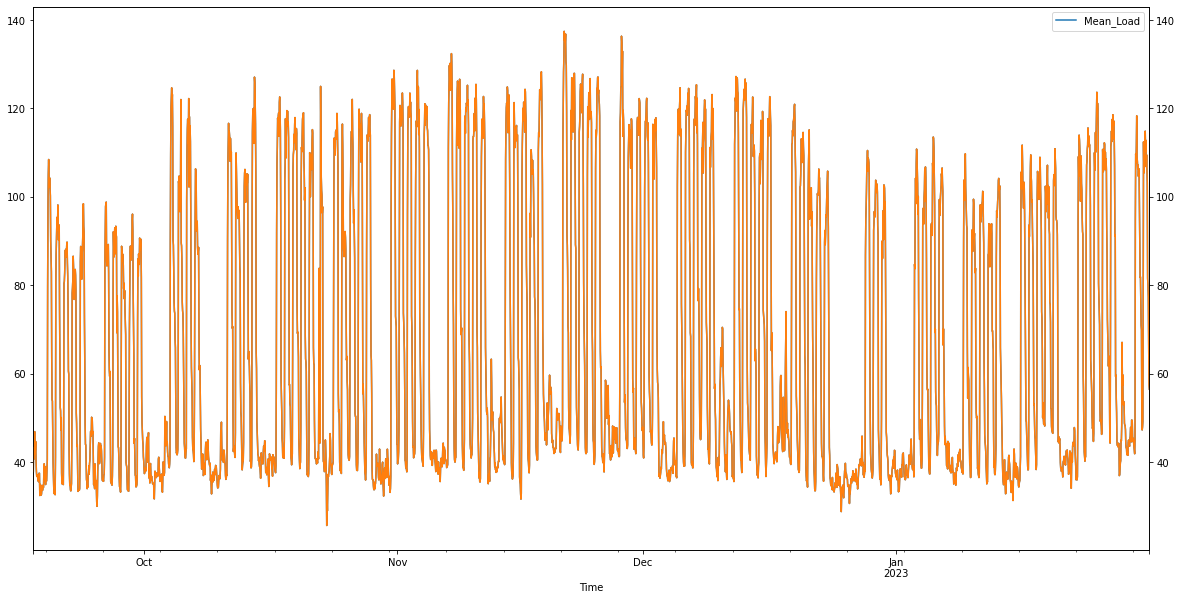

In [7]:
# plt.figure(figsize=(100,20))

df.plot()
df.Mean_Load.plot(secondary_y=True, label="open")

plt.show()

In [8]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

init_notebook_mode(connected=True)

cf.go_offline()

In [9]:
# df.iplot(kind='line', x='Time',y='Mean_Load',title= 'Distribution by hours')

In [10]:
series = df.to_numpy()

In [11]:
series

array([[37.835     ],
       [43.25955172],
       [40.67388333],
       ...,
       [66.34831667],
       [57.426     ],
       [56.462625  ]])

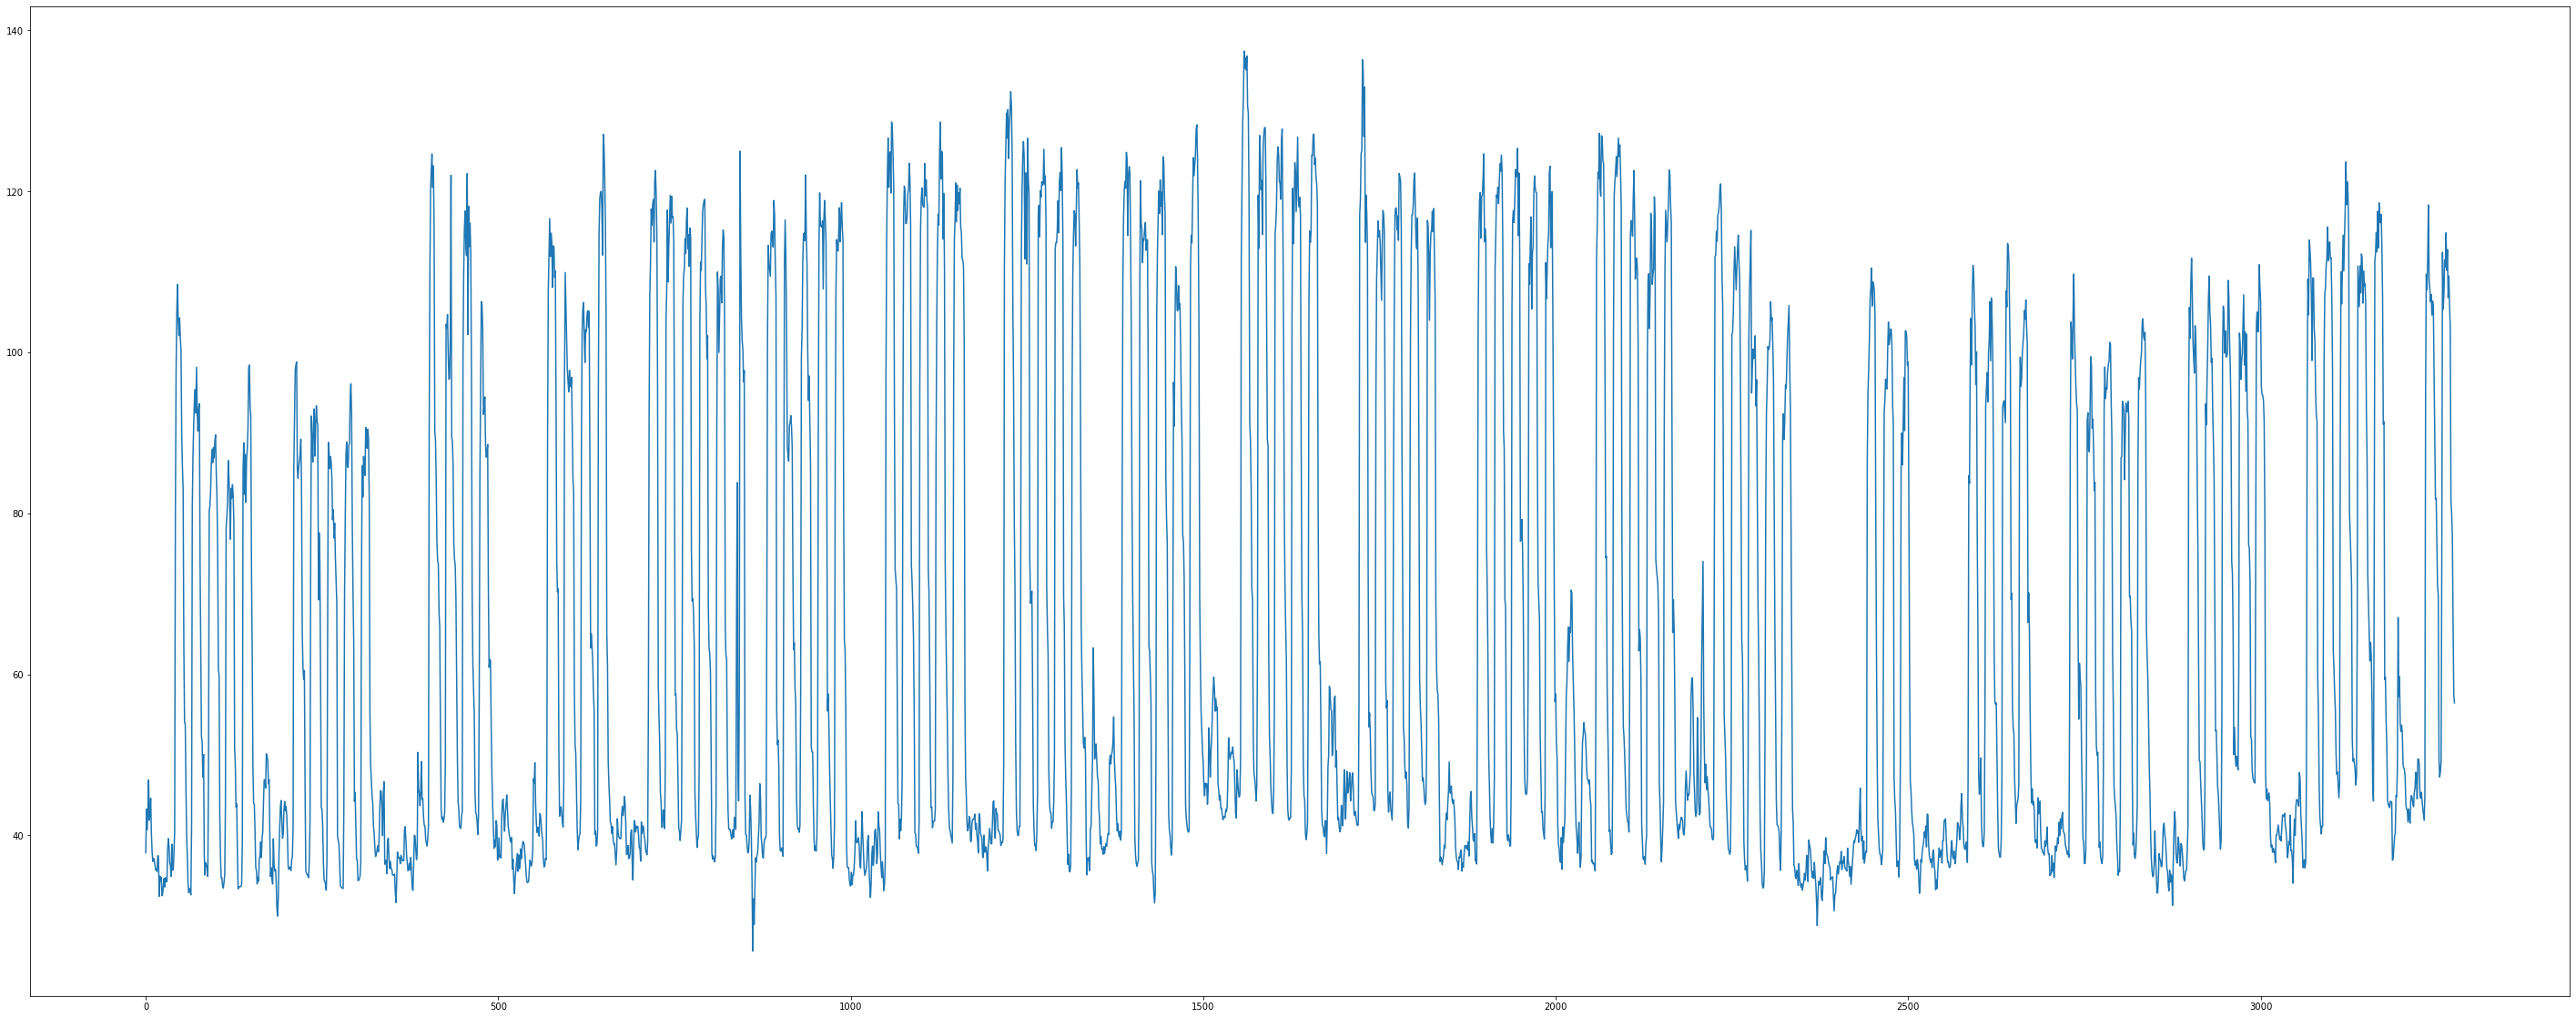

In [12]:
plt.rcParams["figure.figsize"] = (50, 20)

plt.plot(series)

In [16]:
! pip install dtaidistance

In [17]:
!pip install dtw-python

#### Hierarchical clustering 

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
100%|█████████████████████████████████████████████████████████████████████████████▉| 3273/3276 [01:52<00:00, 27.05it/s]DTAIDistance C-extension for Numpy is not available. Proceeding anyway.

  7%|█████▌                                                                         | 231/3276 [00:07<01:39, 30.59it/s]


 15%|███████████▌                                                                   | 480/3276 [00:16<01:36, 28.88it/s]


 22%|█████████████████▍                                                             | 724/3276 [00:24<01:26, 29.57it/s]


 29%|███████████████████████▏                                                       | 964/3276 [00:32<01:24, 27.48it/s]


 37%|████████████████████████████▋                                                 | 1207/3276 [00:40<01:13, 28.07it/s]


 44%|██████████████████████████████████▏                                           | 1434/3276 [00:48<01:02, 29.30it/s]


 51%|███████████████████████████████████████▋                                      | 1669/3276 [00:57<00:54, 29.31it/s]


 58%|█████████████████████████████████████████████▎                                | 1902/3276 [01:05<00:50, 27.03it/s]


 66%|███████████████████████████████████████████████████                           | 2146/3276 [01:13<00:36, 30.97it/s]


 73%|████████████████████████████████████████████████████████▉                     | 2390/3276 [01:22<00:29, 30.25it/s]


 81%|██████████████████████████████████████████████████████████████▊               | 2639/3276 [01:30<00:21, 29.06it/s]


 88%|████████████████████████████████████████████████████████████████████▍         | 2875/3276 [01:38<00:14, 27.85it/s]


 95%|██████████████████████████████████████████████████████████████████████████    | 3112/3276 [01:46<00:05, 30.45it/s]


100%|█████████████████████████████████████████████████████████████████████████████▉| 3275/3276 [01:52<00:00, 29.16it/s]


(None, array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

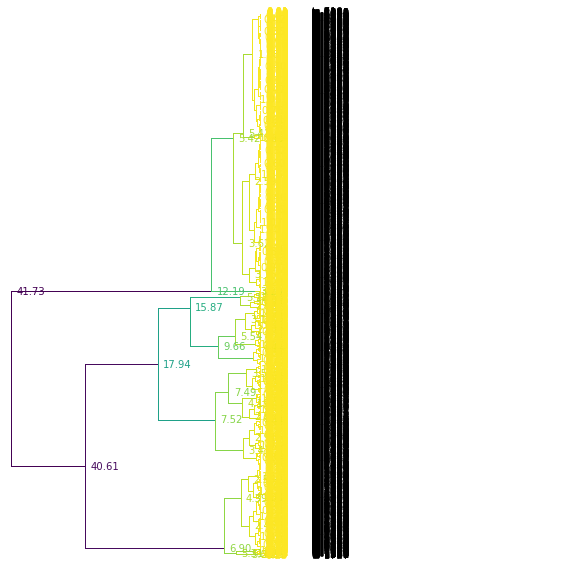

In [20]:
# from dtaidistance import clustering
# model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
# cluster_idx = model1.fit(series)
# model2 = clustering.HierarchicalTree(model1)
# cluster_idx = model2.fit(series)
# # Let’s plot this clustering.

# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (50, 20)
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
# show_ts_label = lambda idx: "ts-" + str(idx)
# model2.plot(axes=ax, show_ts_label=show_ts_label,
#            show_tr_label=True, ts_label_margin=-10,
#            ts_left_margin=10, ts_sample_length=1)


from dtaidistance import dtw
from dtaidistance import clustering
model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
cluster_idx = model1.fit(series)
model2 = clustering.HierarchicalTree(model1)
cluster_idx = model2.fit(series)
# Let’s plot this clustering.

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50, 20)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
show_ts_label = lambda idx: "ts-" + str(idx)
model2.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)

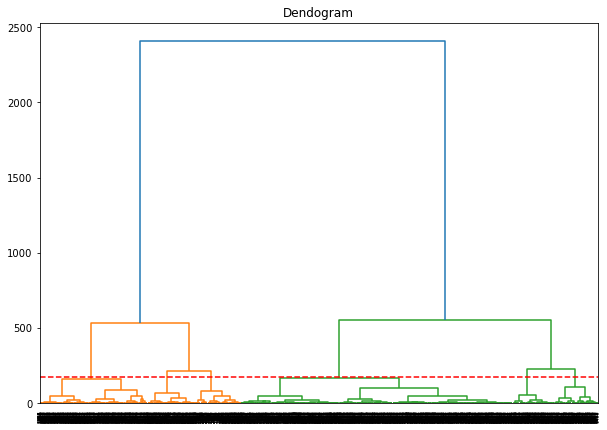

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram

# # Compute linkage matrix using complete linkage method
# Z = linkage(series, method='complete')

# # Plot dendrogram
# plt.figure(figsize=(20, 10))
# dendrogram(Z)
# plt.show()

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(series,method='ward'))
plt.axhline(y=175, color='r', linestyle='--')


In [33]:
unique_colors = set(dend['color_list'])
print(unique_colors)
len(unique_colors)-1

{'C1', 'C2', 'C0'}


2

#### Linkage clustering 

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


(None, array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

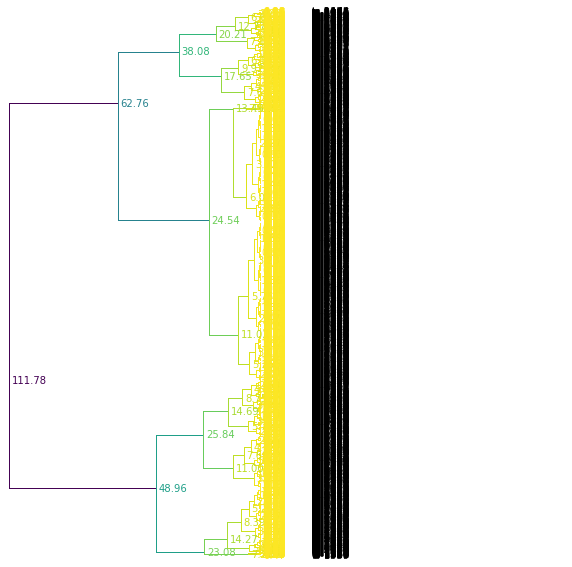

In [34]:
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(series)
# Let’s plot the clusters.

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
show_ts_label = lambda idx: "ts-" + str(idx)
model3.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)

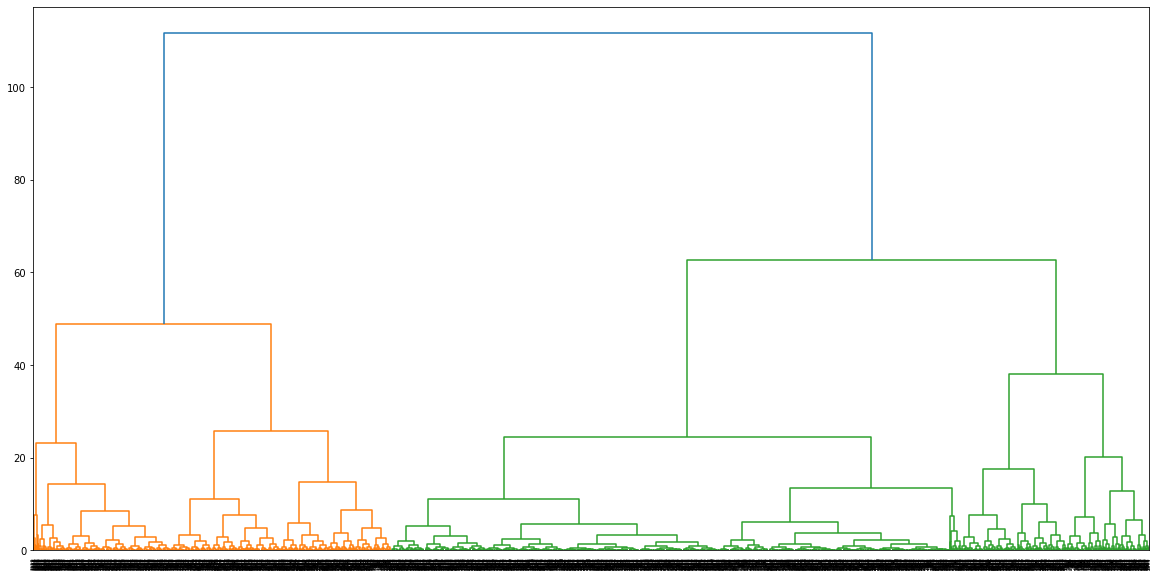

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


In [36]:
from dtaidistance import clustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute linkage matrix using complete linkage method
Z = linkage(series, method='complete')

# Plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.show()

model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(series)

# Let's plot the clusters and dendrogram
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# show_ts_label = lambda idx: "ts-" + str(idx)
# model3.plot(axes=ax[0], show_ts_label=show_ts_label,
#             show_tr_label=True, ts_label_margin=-10,
#             ts_left_margin=10, ts_sample_length=1)
# ax[1].set_title("Dendrogram")
# dendrogram(Z, ax=ax[1])
# # # Get unique colors used in the dendrogram
# # unique_colors = []
# # for line in ax[1].get_lines():
# #     color = line.get_color()
# #     if color not in unique_colors:
# #         unique_colors.append(color)
# # ax[2].axis("off")
# # ax[2].text(0, 0.5, "Unique colors in the dendrogram:\n" + str(unique_colors))
# plt.show()


In [37]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Assuming you have your data in a numpy array called "data"
# Each row of the data array represents a data point
# The number of columns in the data array represents the number of features

# Create an instance of the AgglomerativeClustering class
clustering_model = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward',)

# Fit the model to the data
predict = clustering_model.fit_predict(df)

predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
main['linkage'] = predict

In [43]:
main

,Time,week_date,Max_Load,Min_Load,Mean_Load,hour_of_the_week,WeekDay,linkage
0,2022-09-17 12:00:00,2022-09-11 (week 37),46.666,29.376,37.835000,133,Saturday,0
1,2022-09-17 13:00:00,2022-09-11 (week 37),51.045,31.066,43.259552,134,Saturday,0
2,2022-09-17 14:00:00,2022-09-11 (week 37),45.432,35.635,40.673883,135,Saturday,0
3,2022-09-17 15:00:00,2022-09-11 (week 37),47.489,36.948,43.198733,136,Saturday,0
4,2022-09-17 16:00:00,2022-09-11 (week 37),59.146,36.043,46.881117,137,Saturday,0
...,...,...,...,...,...,...,...,...
3271,2023-01-31 19:00:00,2023-01-29 (week 5),87.146,72.626,79.960733,44,Tuesday,1
3272,2023-01-31 20:00:00,2023-01-29 (week 5),82.882,70.813,77.210667,45,Tuesday,0
3273,2023-01-31 21:00:00,2023-01-29 (week 5),76.380,57.502,66.348317,46,Tuesday,0
3274,2023-01-31 22:00:00,2023-01-29 (week 5),62.340,52.269,57.426000,47,Tuesday,0


No handles with labels found to put in legend.


The average Silhouette Score is : 0.7833473089887869
The average davies_bouldin Score is : 0.30007122904494177
The average calinski_harabasz Score is : 23265.262928407705


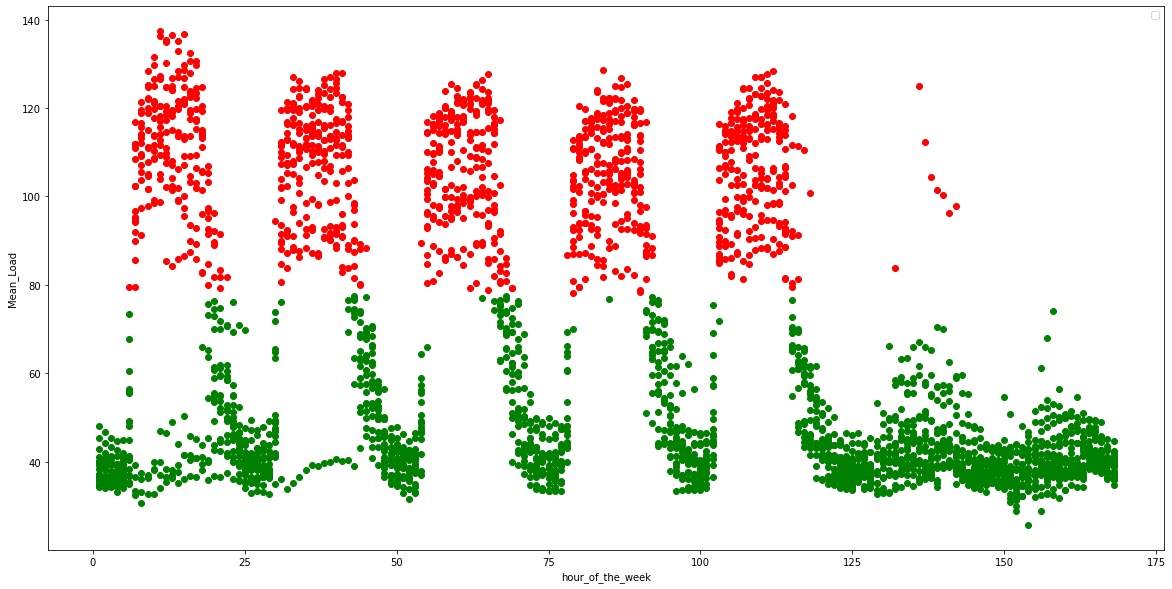

In [53]:
# df['linkage'] = y_predict
df1 = main[main.linkage==0]
df2 = main[main.linkage==1]
df3 = main[main.linkage==2]


plt.scatter(df1.hour_of_the_week, df1['Mean_Load'], color='green')
plt.scatter(df2.hour_of_the_week, df2['Mean_Load'], color='red')
plt.scatter(df3.hour_of_the_week, df3['Mean_Load'], color='black')


plt.xlabel('hour_of_the_week')
plt.ylabel('Mean_Load')
plt.legend()

silhouette_avg = silhouette_score(series,predict)
print("The average Silhouette Score is :", silhouette_avg)

davies_bouldin = davies_bouldin_score(series,predict)
print("The average davies_bouldin Score is :", davies_bouldin)

calinski_harabasz = calinski_harabasz_score(series,predict)
print("The average calinski_harabasz Score is :", calinski_harabasz)



#### K-means clustering 

{}
4.035699999999984


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:10<00:00,  1.07s/it]


(None, array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

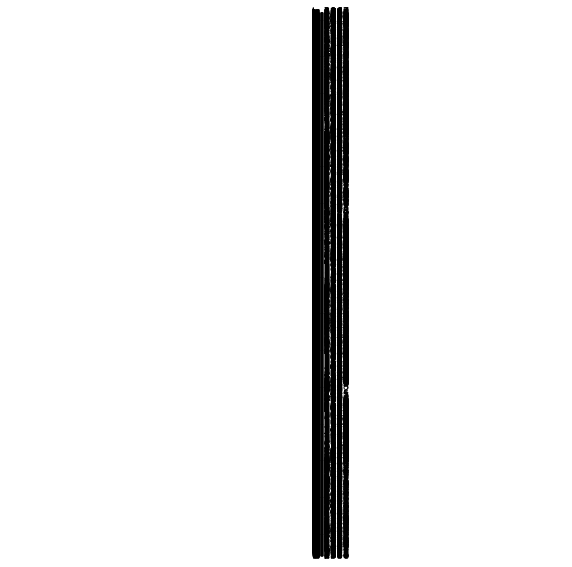

In [46]:
from dtaidistance.clustering import kmeans
model4 = kmeans.KMeans(k=10)
cluster_idx, performed_it = model4.fit(series)
# Here we have used 10 centers to make clusters using k-means clustering. Let’s plot the clusters.

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
show_ts_label = lambda idx: "ts-" + str(idx)
model4.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)


#### K-Medoids clustering 

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


(<Figure size 1440x720 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

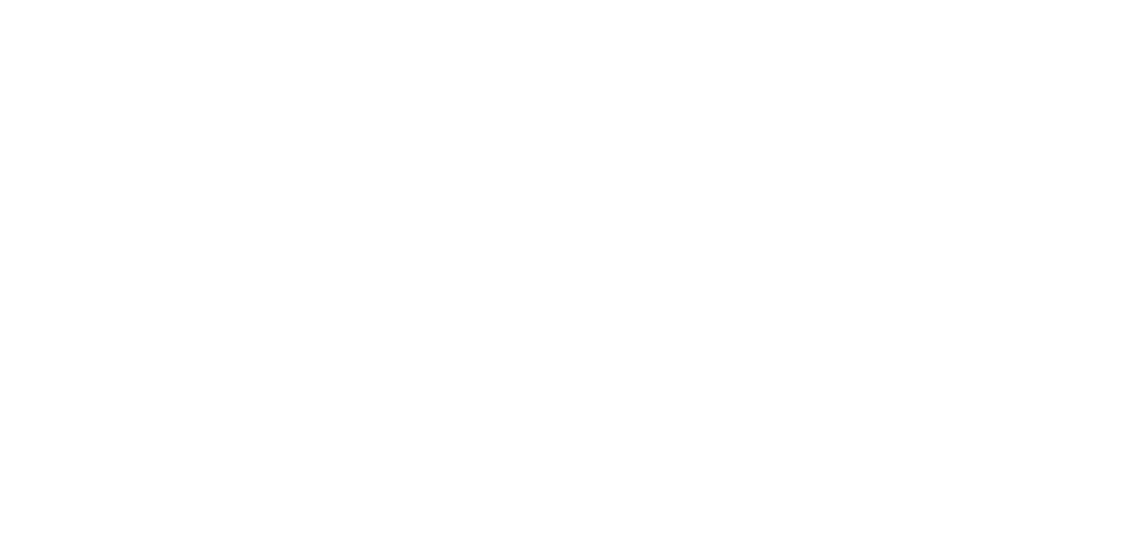

In [54]:
from dtaidistance import dtw, clustering
 
model5 = clustering.KMedoids(dtw.distance_matrix_fast, {}, k=10)
cluster_idx = model5.fit(series)
# Let’s plot the clusters.

model5.plot()

In [ ]:
# !pip install PyClustering 

In [55]:
# import scipy.cluster.hierarchy as shc
# plt.figure(figsize=(10,7))
# plt.title("Dendogram")
# dend = shc.dendrogram(shc.linkage(series,method='ward'))
# plt.axhline(y=175, color='r', linestyle='--')